# RAMEN RATING DATASET ANALYSIS

### This dataset shows the different varieties of ramen in diferent countries according to their brand, style and the number of stars they get.

#### AIMS
1. To know which Brand has more products.
2. To know which packaging is mostly used.
3. To know about the Top 10 variety in 2012 and 2016
4. To know the country that has more products and how many stars their products get.

##### Importing modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Loading and reading Ramen-Rating.csv file

In [36]:
rate = pd.read_csv('ramen-ratings.csv')
rate.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [37]:
# Column Information
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 80.7+ KB


we can see that oout of 7 columns, 6 are of object type and the last one an integer.
5 of them has no NaN values, Style has 2 NaN values and Top Ten has 2539 NaN values.

In [38]:
# Checking the values used
rate['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

##### Separating the rated from the unrated.

In [39]:
# Making Unrated from stars the subject
Str = np.where(rate['Stars'] == 'Unrated')
unrated = rate.loc[Str]
unrated

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


The country with the most unrated is south korea. We can also see that they have the same style (packing)

In [40]:
# From thooose that have rated values
Str = np.where(rate['Stars'] != 'Unrated')
rated = rate.loc[Str]
rated.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [41]:
rated['Stars'] = np.array(rated['Stars']).astype(float)
rated['Stars'].unique()

array([3.75 , 1.   , 2.25 , 2.75 , 4.75 , 4.   , 0.25 , 2.5  , 5.   ,
       4.25 , 4.5  , 3.5  , 1.5  , 3.25 , 2.   , 0.   , 3.   , 0.5  ,
       3.8  , 4.3  , 2.3  , 3.3  , 1.75 , 0.75 , 1.25 , 1.1  , 2.1  ,
       0.9  , 3.1  , 4.125, 3.125, 2.125, 2.9  , 0.1  , 2.8  , 3.7  ,
       3.4  , 3.6  , 2.85 , 3.2  , 3.65 , 1.8  ])

From the above, we see that the values appears only once unlike the former

In [42]:
rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2577 non-null int64
Brand       2577 non-null object
Variety     2577 non-null object
Style       2575 non-null object
Country     2577 non-null object
Stars       2577 non-null float64
Top Ten     41 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 110.7+ KB


Seeing that we converted the stars from string to float to obtain uniform values. The information on Stars has changed.

#### What brand has the most production?

In [43]:
Brand = rate['Brand']
Brand.value_counts().head()
# The Nissin Brand has more product.

Nissin      381
Nongshim     98
Maruchan     76
Mama         71
Paldo        66
Name: Brand, dtype: int64

The Brand with the most count is Nissin. Meaning Nissin has the most production.

#### Which packaging style is mostly used?

In [44]:
style = rate['Style']
style_count = style.value_counts()
style_count

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

We discover that ramen is being sold mostly in Pack style.

### Style Rating

In [45]:
pack_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Pack')]
pack_rate.value_counts().head()

5.00    240
4.00    223
3.75    203
3.50    197
3.25    112
Name: Stars, dtype: int64

In [46]:
Bowl_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Bowl')]
Bowl_rate.value_counts().head()

3.75    74
4.00    68
3.50    63
5.00    49
3.00    40
Name: Stars, dtype: int64

In [47]:
Cup_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Cup')]
Cup_rate.value_counts().head()

4.00    83
5.00    81
3.50    63
3.75    57
3.00    30
Name: Stars, dtype: int64

In [48]:
Tray_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Tray')]
Tray_rate.value_counts().head()

4.00    17
3.75    14
5.00    14
3.50    12
4.25     9
Name: Stars, dtype: int64

In [49]:
Box_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Box')]
Box_rate.value_counts().head()

3.75    2
5.00    2
2.50    1
4.00    1
Name: Stars, dtype: int64

In [50]:
Bar_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Bar')]
Bar_rate.value_counts().head()

4.0    1
Name: Stars, dtype: int64

In [51]:
Can_rate = rated['Stars'].loc[np.where(rated['Style'] == 'Can')]
Can_rate.value_counts().head()

4.5    1
Name: Stars, dtype: int64

This shows that the highest ratings goes to the Packed style.

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


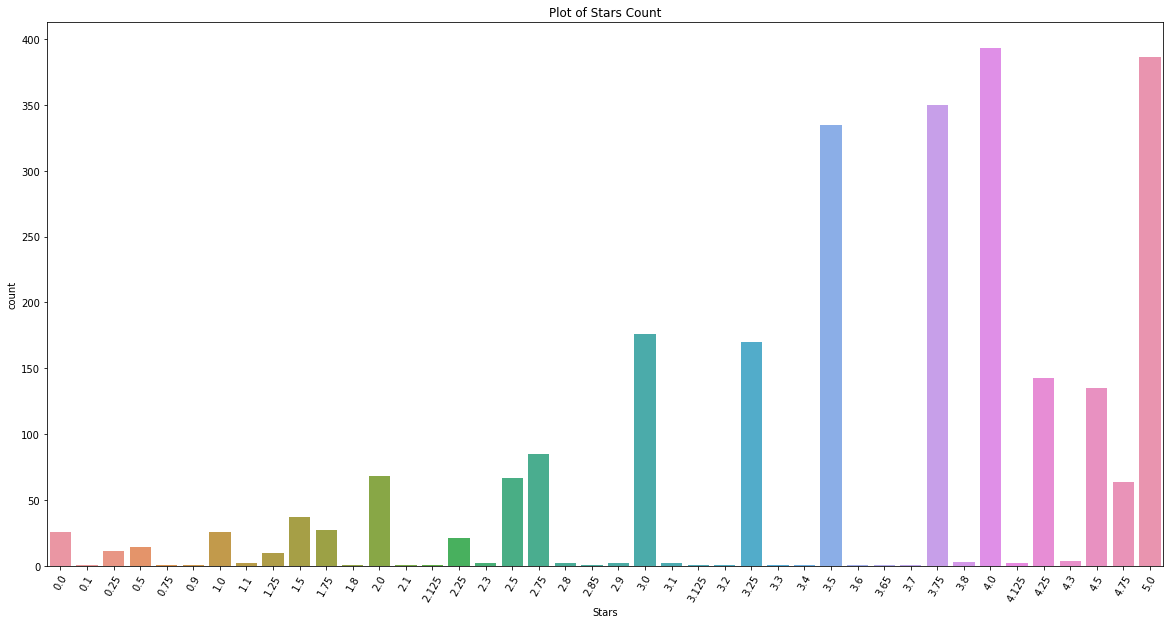

In [52]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Stars', data=rated)
labels = plt.axes().get_xticklabels()
plt.setp(labels, rotation = 60)
plt.title('Plot of Stars Count')
plt.show()

From the graph, the most number of stars is shown to be 4.0 stars which is followed by 5.0 stars.

### Top Ten Varieties

In [53]:
top = rated.dropna().sort_values(by='Top Ten')
top.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2535,45,Indomie,Mi Goreng Sate,Pack,Indonesia,5.00,\n
2248,332,Nongshim,Champong Oriental Noodles,Cup,South Korea,3.75,\n
1846,734,Indomie,Mi Goreng Rasa Ayam Panggang Jumbo (Local),Pack,Indonesia,5.00,\n
1670,910,Paldo,Namja Ramyun,Bowl,South Korea,4.25,\n
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.00,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5.00,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.00,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.00,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.50,2012 #5


#### In 2012

In [54]:
top_2012 = np.where(top['Top Ten'].str.contains('2012'))
top_2012 = top_2012[0]
top_2012

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [55]:
tp_2012 = top[4:13]
tp_2012

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.00,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5.00,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.00,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.00,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.50,2012 #5
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012 #6
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012 #7
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.50,2012 #9


In [56]:
tp_2012['Country'].value_counts()

Indonesia      3
Japan          3
South Korea    1
Hong Kong      1
Singapore      1
Name: Country, dtype: int64

In [57]:
# The mean rating for top 10 in year 2012 is
np.mean(np.array(tp_2012['Stars']))

4.777777777777778

In 2012, the mean number of stars is given as 4.777777777777778. And the countries that has more products are japan and indonesia. Also most of the product are packed except one.

#### In 2016

In [58]:
top_2016 = np.where(top['Top Ten'].str.contains('2016'))[0]
top_2016

array([35, 36, 37, 38, 39, 40], dtype=int32)

In [59]:
tp_2016 = top[35:41]
tp_2016

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.0,2016 #5
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.0,2016 #7
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.0,2016 #9


In [60]:
np.mean(np.array(tp_2016['Stars']))

5.0

In [61]:
tp_2016['Country'].value_counts()

Singapore    3
Myanmar      1
Taiwan       1
China        1
Name: Country, dtype: int64

In 2016, the mean number of stars for the top 10 is 5.0, which means the top 10 product this year were excellent. The country with the most product is Singapore and all the products were packed.

### Country

In [62]:
country = rate['Country']
country.value_counts().head(10)

Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Name: Country, dtype: int64

In [63]:
japan = np.where(rate['Country'] == 'Japan')[0]
japan_star = rated.loc[japan]['Stars']
japan_star

0       3.75
6       4.00
7       3.75
8       0.25
13      4.50
        ... 
2554    4.00
2555    3.00
2556    2.00
2567    5.00
2568    2.50
Name: Stars, Length: 352, dtype: float64

In [64]:
mean_star = np.mean(np.array(japan_star))
mean_star

3.981605113636364

The country with the most product is Japan and the least is Nigeria

In [65]:
# Taking a look on Nigeria
nigeria = np.where(rate['Country'] == 'Nigeria')[0]
nigeria

array([78], dtype=int32)

In [66]:
# Details  of Nigeria
rate.loc[78]

Review #                    2502
Brand                    Indomie
Variety     Onion Chicken Flavor
Style                       Pack
Country                  Nigeria
Stars                        1.5
Top Ten                      NaN
Name: 78, dtype: object

### STARS

In [67]:
rate_star = rate[['Brand', 'Variety', 'Style', 'Country', 'Stars']]
rate_star = rate_star.set_index('Stars').sort_values(by='Stars')
rate_star.head()

,Brand,Variety,Style,Country
Stars,,,,
0,Urban Noodle,Authentic Street Food Black Bean,Cup,UK
0,US Canning,Fu Chang Chinese Noodle Company Pork Seafood,Tray,USA
0,Baijia,Broad Noodle Pickled Vegetable Artificial Beef...,Pack,China
0,Thai Smile,Mushroom Rice Noodle Soup Bowl,Bowl,USA
0,Kim Ve Wong,Jaopai Series: Vegetarian Instant Noodles,Bowl,Taiwan


In [68]:
# Maximum stars
max_star = rate_star.loc['5']
max_star.head()

,Brand,Variety,Style,Country
Stars,,,,
5,Chering Chang,Instant Non-Fried Noodles Shallot Pork Flavour,Pack,Taiwan
5,Nongshim,Jinjja Jinjja (New),Pack,South Korea
5,TTL,Sesame Oil Chicken Noodle With Rice Wine,Bowl,Taiwan
5,Salam Mie,Mi Goreng Ala Jawa Dengan Sambal Cabe Asli,Pack,Indonesia
5,Mama,Instant Cup Noodles Seafood Pad Kee Mao Flavour,Cup,Thailand
